## Capstone Project — The Battle of Neighbourhoods
### Introduction
New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.

New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.

The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies. Over last decades it is continuously grow because of the city’s important role in government and commercial business.

With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project , we will list and visualise all major parts of New Delhi City .

### Data
For this project we need the following data :

New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
#### Data source : https://www.kaggle.com/shrutimehta/zomato-restaurants-data
Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
Nearby places in each locality of new delhi city.
#### Data source : https://developer.foursquare.com/
Description : By using this api we will get all the venues in each neighborhood.

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


You should consider upgrading via the 'd:\software installed\anaconda\python.exe -m pip install --upgrade pip' command.


## Read the zomato resturant data from csv file

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/adarsh-dikhit/Applied-Data-Science-Capstone/main/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [3]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

## Data Cleaning
#### remove the unwanted columns and rows from dataset

In [4]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [5]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [6]:
df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

### created map to show the restaurant cluters 

In [7]:
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [8]:
df_Res.head()


Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        1  
2        1  
3        1  
4        1  
5        1

## What places are have best restaurant in New Delhi?


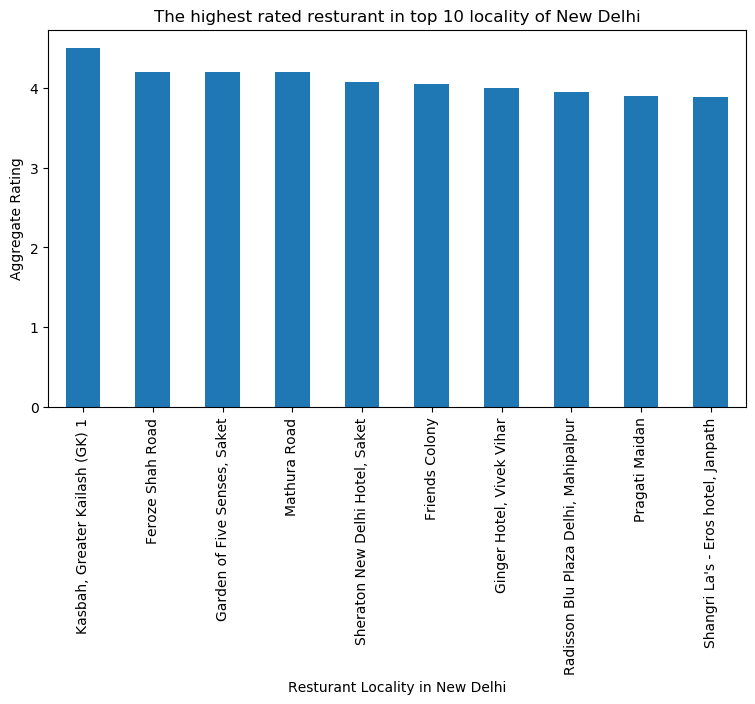

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()


## what places are have worst restaurants in New Delhi?

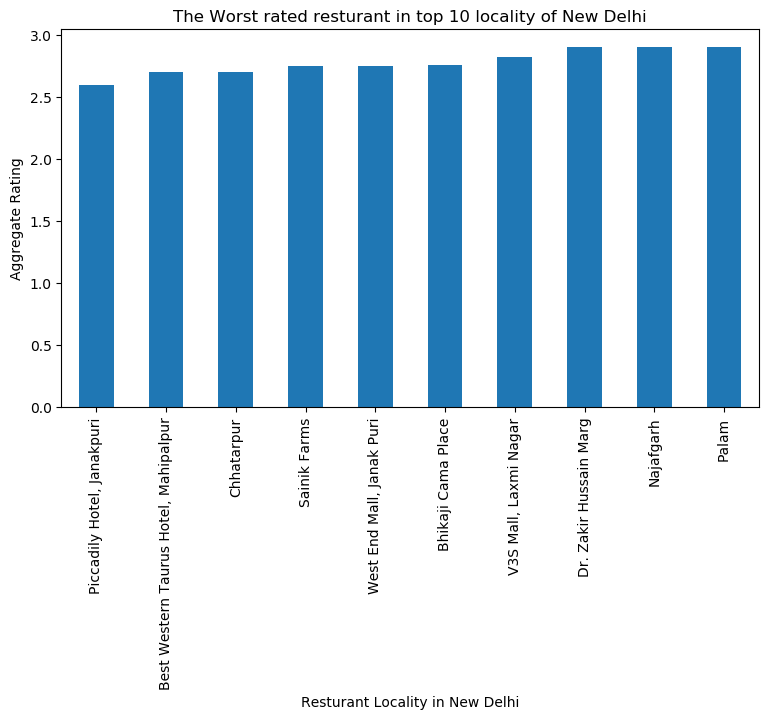

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

## Which place are suitable for edible person in New Delhi city?

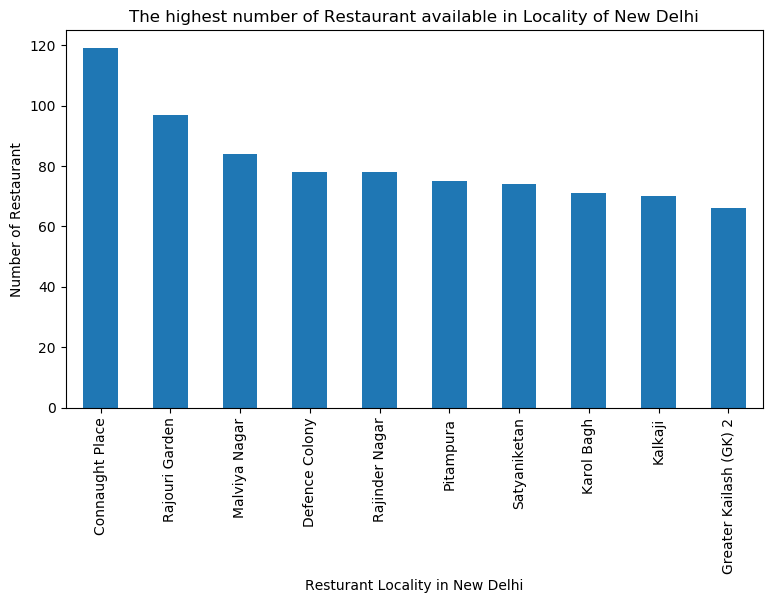

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

## Which place are not suitable for edible person in New Delhi city?


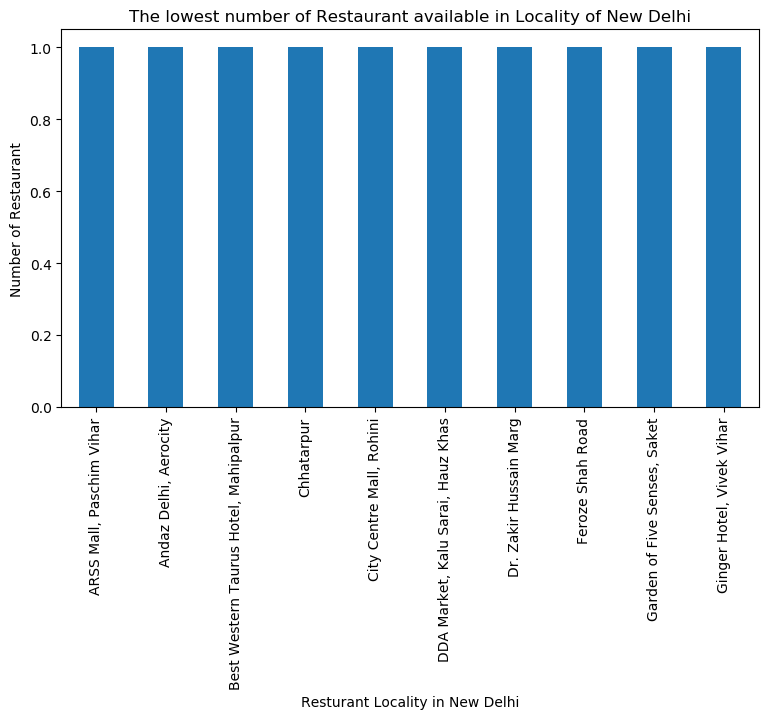

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

## What are the best places for chinese restaurant in New Delhi city

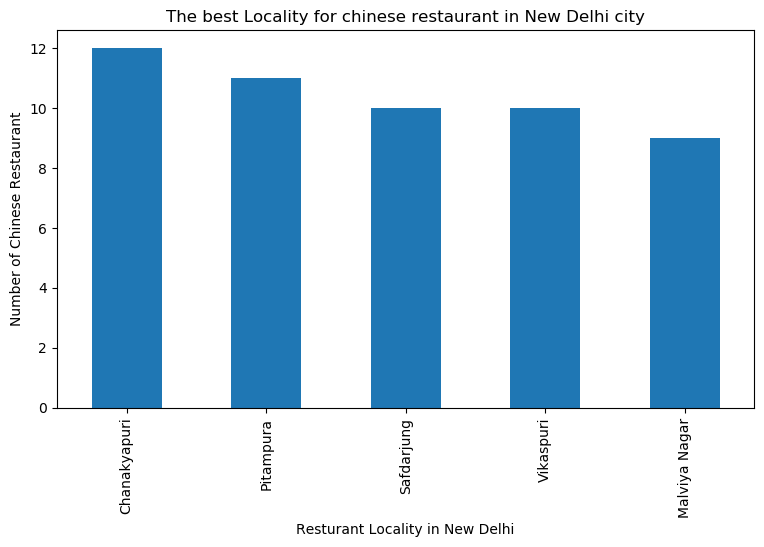

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

## which places are the best chinese resturants in New Delhi?  

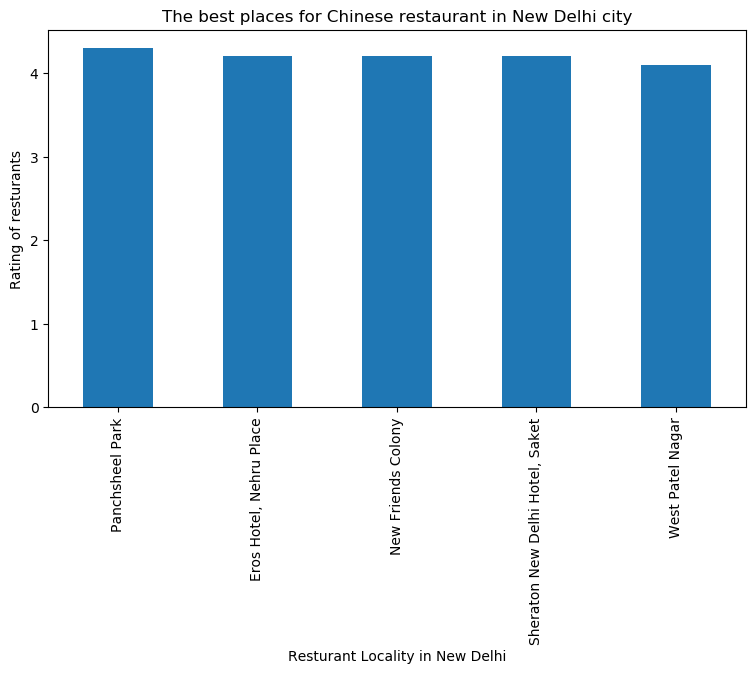

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

### Data transformation
Based on Locality grouping the data

In [15]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [16]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [17]:
df_final.shape

(240, 8)

## Define Foursquare Credentials and Version


In [18]:

## Define Foursquare Credentials and Version
CLIENT_ID = 'ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ' # Foursquare ID
CLIENT_SECRET = 'H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ES3ZXR1ALGY0Q0YQVMG0RUMAO00WTUNG4K1C2JN5C2J0O1AZ
CLIENT_SECRET:H3VNVPRCUTEX4NP23B4ANBLXWZKKIZ0VM4NKN0IQRYPYXPTW


## create a function to repeat the same process to all the Locality in New Delhi


In [19]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## find the venues in all New Delhi Locality

In [20]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [21]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [22]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  Locality Longitude  Venue  \
Locality                                                                       
ARSS Mall, Paschim Vihar                        9                   9      9   
Adchini                                         5                   5      5   
Aditya Mega Mall, Karkardooma                  10                  10     10   
Aerocity                                        7                   7      7   
Aggarwal City Mall, Pitampura                   5                   5      5   
...                                           ...                 ...    ...   
West Gate Mall, Rajouri Garden                 15                  15     15   
West Patel Nagar                                5                   5      5   
Worldmark 1, Aerocity                          28                  28     28   
Yusuf Sarai                                    13                  13     13   
ibis New Delhi, Aerocity                       26                  26     26   

                                Venue Latitude  Venue Longitude  \
Locality                                                          
ARSS Mall, Paschim Vihar                     9                9   
Adchini                                      5                5   
Aditya Mega Mall, Karkardooma               10               10   
Aerocity                                     7                7   
Aggarwal City Mall, Pitampura                5                5   
...                                        ...              ...   
West Gate Mall, Rajouri Garden              15               15   
West Patel Nagar                             5                5   
Worldmark 1, Aerocity                       28               28   
Yusuf Sarai                                 13               13   
ibis New Delhi, Aerocity                    26               26   

                                Venue Category  
Locality                                        
ARSS Mall, Paschim Vihar                     9  
Adchini                                      5  
Aditya Mega Mall, Karkardooma               10  
Aerocity                                     7  
Aggarwal City Mall, Pitampura                5  
...                                        ...  
West Gate Mall, Rajouri Garden              15  
West Patel Nagar                             5  
Worldmark 1, Aerocity                       28  
Yusuf Sarai                                 13  
ibis New Delhi, Aerocity                    26  

[238 rows x 6 columns]

In [23]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 215 uniques categories.


In [24]:
## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Lounge  Airport Service  \
0                   0        0               0                0   
1                   0        0               0                0   
2                   0        0               0                0   
3                   0        0               0                0   
4                   0        0               0                0   

   Airport Terminal  American Restaurant  ...  Trail  Train Station  \
0                 0                    0  ...      0              0   
1                 0                    0  ...      0              0   
2                 0                    0  ...      0              0   
3                 0                    0  ...      0              0   
4                 0                    0  ...      0              0   

   Turkish Restaurant  Udupi Restaurant  Vegetarian / Vegan Restaurant  \
0                   0                 0                              0   
1                   0                 0                              0   
2                   0                 0                              0   
3                   0                 0                              0   
4                   0                 0                              0   

   Vietnamese Restaurant  Whisky Bar  Wine Bar  Wings Joint  Women's Store  
0                      0           0         0            0              0  
1                      0           0         0            0              0  
2                      0           0         0            0              0  
3                      0           0         0            0              0  
4                      0           0         0            0              0  

[5 rows x 216 columns]

In [25]:
New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  Accessories Store  \
0          ARSS Mall, Paschim Vihar  0.111111           0.000000   
1                           Adchini  0.000000           0.000000   
2     Aditya Mega Mall, Karkardooma  0.000000           0.000000   
3                          Aerocity  0.000000           0.000000   
4     Aggarwal City Mall, Pitampura  0.000000           0.000000   
..                              ...       ...                ...   
233  West Gate Mall, Rajouri Garden  0.000000           0.000000   
234                West Patel Nagar  0.000000           0.000000   
235           Worldmark 1, Aerocity  0.000000           0.035714   
236                     Yusuf Sarai  0.000000           0.000000   
237        ibis New Delhi, Aerocity  0.000000           0.000000   

     Afghan Restaurant  African Restaurant  Airport  Airport Lounge  \
0                  0.0                 0.0      0.0        0.000000   
1                  0.0                 0.0      0.0        0.000000   
2                  0.0                 0.0      0.0        0.000000   
3                  0.0                 0.0      0.0        0.142857   
4                  0.0                 0.0      0.0        0.000000   
..                 ...                 ...      ...             ...   
233                0.0                 0.0      0.0        0.000000   
234                0.0                 0.0      0.0        0.000000   
235                0.0                 0.0      0.0        0.000000   
236                0.0                 0.0      0.0        0.000000   
237                0.0                 0.0      0.0        0.000000   

     Airport Service  Airport Terminal  American Restaurant  ...  Trail  \
0                0.0          0.000000             0.000000  ...    0.0   
1                0.0          0.000000             0.000000  ...    0.0   
2                0.0          0.000000             0.000000  ...    0.0   
3                0.0          0.142857             0.000000  ...    0.0   
4                0.0          0.000000             0.000000  ...    0.0   
..               ...               ...                  ...  ...    ...   
233              0.0          0.000000             0.066667  ...    0.0   
234              0.0          0.000000             0.000000  ...    0.0   
235              0.0          0.000000             0.000000  ...    0.0   
236              0.0          0.000000             0.000000  ...    0.0   
237              0.0          0.000000             0.000000  ...    0.0   

     Train Station  Turkish Restaurant  Udupi Restaurant  \
0         0.000000                 0.0               0.0   
1         0.000000                 0.0               0.0   
2         0.000000                 0.0               0.0   
3         0.000000                 0.0               0.0   
4         0.000000                 0.0               0.0   
..             ...                 ...               ...   
233       0.000000                 0.0               0.0   
234       0.000000                 0.0               0.0   
235       0.035714                 0.0               0.0   
236       0.000000                 0.0               0.0   
237       0.038462                 0.0               0.0   

     Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Whisky Bar  \
0                              0.0                    0.0         0.0   
1                              0.0                    0.0         0.0   
2                              0.0                    0.0         0.0   
3                              0.0                    0.0         0.0   
4                              0.0                    0.0         0.0   
..                             ...                    ...         ...   
233                            0.0                    0.0         0.0   
234                            0.0                    0.0         0.0   
235                            0.0                    0.0         0.0   
236  

In [26]:
New_Delhi_grouped.shape

(238, 216)

In [27]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                venue  freq
0   Indian Restaurant  0.22
1                 ATM  0.11
2              Market  0.11
3         Coffee Shop  0.11
4  Chinese Restaurant  0.11


----Adchini----
               venue  freq
0               Café   0.4
1  Indian Restaurant   0.2
2                Pub   0.2
3   Parsi Restaurant   0.2
4                ATM   0.0


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1          Multiplex   0.2
2      Shopping Mall   0.2
3  Indian Restaurant   0.2
4              Hotel   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1  Fast Food Restaurant  0.14
2        Airport Lounge  0.14
3           Coffee Shop  0.14
4      Airport Terminal  0.14


----Aggarwal City Mall, Pitampura----
                venue  freq
0    Department Store   0.2
1         Pizza Place   0.2
2   Indian Restaurant   0.2
3  Chinese Restaurant   0.2
4    Business Service   0.2


----Agga

In [28]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                           Adchini                  Café   
2     Aditya Mega Mall, Karkardooma           Pizza Place   
3                          Aerocity                 Hotel   
4     Aggarwal City Mall, Pitampura           Pizza Place   
..                              ...                   ...   
233  West Gate Mall, Rajouri Garden  Fast Food Restaurant   
234                West Patel Nagar           Pizza Place   
235           Worldmark 1, Aerocity                 Hotel   
236                     Yusuf Sarai    Chinese Restaurant   
237        ibis New Delhi, Aerocity                 Hotel   

    2nd Most Common Venue 3rd Most Common Venue  \
0          Sandwich Place                Market   
1       Indian Restaurant      Parsi Restaurant   
2       Indian Restaurant         Shopping Mall   
3        Airport Terminal        Airport Lounge   
4        Business Service    Chinese Restaurant   
..                    ...                   ...   
233                  Café            Restaurant   
234                 Hotel     Electronics Store   
235     Indian Restaurant             Hotel Bar   
236     Indian Restaurant           Coffee Shop   
237     Indian Restaurant             Hotel Bar   

              4th Most Common Venue 5th Most Common Venue  \
0    Multicuisine Indian Restaurant           Coffee Shop   
1                               Pub         Women's Store   
2                         Multiplex                  Café   
3               Rental Car Location           Coffee Shop   
4                  Department Store     Indian Restaurant   
..                              ...                   ...   
233                     Pizza Place         Shopping Mall   
234            Gym / Fitness Center         Metro Station   
235                 Bed & Breakfast           Coffee Shop   
236                            Park                   Bar   
237                     Coffee Shop                Lounge   

         6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Chinese Restaurant                   ATM           Pizza Place   
1         Fast Food Restaurant    Frozen Yogurt Shop   Fried Chicken Joint   
2                        Hotel   Fried Chicken Joint     French Restaurant   
3         Fast Food Restaurant     French Restaurant            Food Truck   
4    Indian Chinese Restaurant  Fast Food Restaurant   Fried Chicken Joint   
..                         ...                   ...                   ...   
233                 Hookah Bar                Garden             Multiplex   
234          Fish & Chips Shop    Frozen Yogurt Shop   Fried Chicken Joint   
235                     Bakery         Shopping Mall             Gastropub   
236           Asian Restaurant     Korean Restaurant          Dessert Shop   
237        Dumpling Restaurant                   Spa    Punjabi Restaurant   

    9th Most Common Venue 10th Most Common Venue  
0             Flower Shop            Gaming Cafe  
1       French Restaurant             Food Truck  
2              Food Truck             Food Court  
3             Flea Market    Fried Chicken Joint  
4       French Restaurant             Food Truck  
..                    ...                    ...  
233          Dessert Shop      Indian Restaurant  
234     French Restaurant             Food Truck  
235                   Spa                 Lounge  
236   Japanese Restaurant                  Hotel  
237       Bed & Breakfast              Gastropub  

[238 rows x 11 columns]

In [42]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 6

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(238,)

In [46]:
# add clustering labels
New_Delhi_merged = df_final.head(238)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')
New_Delhi_merged.head()

D:\Software Installed\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               1   
1  Average, Good, Poor, Very Good         1560               0   
2                   Average, Good          434               1   
3                         Average           59               4   
4                         Average          126               1   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant        Sandwich Place                Market   
1                  Café     Indian Restaurant      Parsi Restaurant   
2           Pizza Place     Indian Restaurant         Shopping Mall   
3                 Hotel      Airport Terminal        Airport Lounge   
4           Pizza Place      Business Service    Chinese Restaurant   

            4th Most Common Venue 5th Most Common Venue  \
0  Multicuisine Indian Restaurant           Coffee Shop   
1                             Pub         Women's Store   
2                       Multiplex                  Café   
3             Rental Car Location           Coffee Shop   
4                Department Store     Indian Restaurant   

       6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0         Chinese Restaurant                   ATM           Pizza Place   
1       Fast Food Restaurant    Frozen Yogurt Shop   Fried Chicken Joint   
2                      Hotel   Fried Chicken Joint     French Restaurant   
3       Fast Food Restaurant     French Restaurant            Food Truck   
4  Indian Chinese Restaurant  Fast Food Restaurant   Fried Chicken Joint   

  9th Most Common Venue 10th Most Common Venue  
0           Flower Shop            Gaming Cafe  
1     French Restaurant             Food Truck  
2            Food Truck             Food Court  
3           Flea Market    Fried Chicken Joint  
4     French Restaurant             Food Truck

In [50]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        # fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       

In [51]:
## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                        Comments  No_of_Votes  \
1    28.537063    3.292308  Average, Good, Poor, Very Good         1560   
6    28.527088    3.117391             Average, Good, Poor         1012   
7    28.541298    3.425000        Average, Good, Very Good         2460   
8    28.555599    3.800000              Average, Very Good         2411   
17   28.557846    3.220000             Average, Good, Poor         1875   
..         ...         ...                             ...          ...   
226  28.525054    3.322222                   Average, Good         1940   
228  28.596073    3.052941                   Average, Good          305   
231  28.637492    3.062264             Average, Good, Poor         1253   
234  28.630044    2.750000                   Average, Poor          238   
236  28.648177    3.675000        Average, Good, Very Good          876   

     Cluster Labels    1st Most Common Venue 2nd Most Common Venue  \
1                 0                     Café     Indian Restaurant   
6                 0  New American Restaurant           Coffee Shop   
7                 0              Coffee Shop         Shopping Mall   
8                 0                     Café               Stadium   
17                0                     Café            Restaurant   
..              ...                      ...                   ...   
226               0              Pizza Place    Chinese Restaurant   
228               0                      ATM         Garden Center   
231               0              Pizza Place  Fast Food Restaurant   
234               0     Fast Food Restaurant     Indian Restaurant   
236               0              Pizza Place                 Hotel   

    3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  \
1        Parsi Restaurant                     Pub         Women's Store   
6              Steakhouse       Food & Drink Shop                Market   
7    Fast Food Restaurant      Italian Restaurant        Clothing Store   
8             Coffee Shop             Golf Course           Music Venue   
17            Pizza Place    Fast Food Restaurant    Chinese Restaurant   
..                    ...                     ...                   ...   
226                   Bar                    Bank        Sandwich Place   
228           Gaming Cafe  Furniture / Home Store    Frozen Yogurt Shop   
231        Ice Cream Shop  Furniture / Home Store    Frozen Yogurt Shop   
234        Sandwich Place             Pizza Place           Coffee Shop   
236     Electronics Store    Gym / Fitness Center         Metro Station   

    6th Most Common Venue   7th Most Common Venue  \
1    Fast Food Restaurant      Frozen Yogurt Shop   
6           Women's Store  Furniture / Home Store   
7                    Café        Asian Restaurant   
8           Metro Station    Other Great Outdoors   
17            Coffee Shop       Indian Restaurant   
..                    ...                     ...   
226  Fast Food Restaurant                    Café   
228   Fried Chicken Joint       French Restaurant   
231   Fried Chicken Joint       French Restaurant   
234             BBQ Joint             Music Store   
236     Fish & Chips Shop      Frozen Yogurt Shop   

             8th Most Common Venue        9th Most Common Venue  \
1              Fried Chicken Joint            French Restaurant   
6               Frozen Yogurt Shop          Fried Chicken Joint   
7                Indian Restaurant           Chinese Restaurant   
8                     Dessert Shop                        Hotel   
17                  Nightlife Spot            Food & Drink Shop   
..                             ...                          ...   
226  Vegetarian / Vegan Restaurant  Eastern European Restaurant   
228                     Food Truck                   Food Court   
231                     Food Truck                   Food Court   
234             Chinese Restaurant           Light Rail Stati

In [52]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
0    28.668945    3.100000                              Average          117   
2    28.656131    3.275000                        Average, Good          434   
4    28.690020    3.033333                              Average          126   
12   28.641698    3.050000                              Average           17   
15   28.691136    3.390909             Average, Good, Very Good          485   
16   28.630440    3.208333                  Average, Good, Poor         1779   
23   28.656414    3.358182             Average, Good, Very Good         6668   
33   28.657388    3.320000                        Average, Good          636   
43   28.643320    3.287500       Average, Good, Poor, Very Good         2570   
46   28.573241    3.225000                  Average, Good, Poor         1106   
47   28.681582    3.046875                  Average, Good, Poor         1224   
49   28.602169    2.900000                              Average            7   
55   28.617102    4.200000                            Very Good         3010   
61   28.668181    3.400000                              Average           33   
66   28.699373    3.252174                        Average, Good          973   
71   28.641003    3.650000                        Average, Good          367   
76   28.576785    3.200000                        Average, Good          143   
77   28.631728    3.060714       Average, Good, Poor, Very Good         1650   
80   28.611614    3.366667                        Average, Good          291   
82   28.548371    3.137500                  Average, Good, Poor          609   
84   28.630942    3.122000       Average, Good, Poor, Very Good         1738   
85   28.648885    3.561111             Average, Good, Very Good         7411   
92   28.584294    3.100000                              Average           35   
97   28.662972    3.533333                   Average, Very Good          293   
98   28.651527    3.490909             Average, Good, Very Good         3222   
108  28.563827    3.800000                      Good, Very Good         1092   
113  28.541242    2.984615                              Average          817   
116  28.486576    2.950000                              Average            8   
118  28.646549    3.200000                              Average           20   
126  28.602860    2.973214                  Average, Good, Poor         1831   
133  28.708185    3.344444             Average, Good, Very Good          568   
138  28.556145    3.040909                  Average, Good, Poor          637   
140  28.627959    3.004167                              Average          326   
144  28.591092    3.200000                  Average, Good, Poor          993   
152  28.544464    3.525000                   Average, Very Good          231   
155  28.669160    3.148214                  Average, Good, Poor         2735   
159  28.613748    3.900000                   Average, Excellent         2313   
164  28.668055    3.393333  Average, Excellent, Good, Very Good         4670   
176  28.562460    3.269231       Average, Good, Poor, Very Good         8739   
198  28.636712    3.023529                        Average, Poor          185   
203  28.601187    3.633333                        Average, Good         1018   
206  28.538993    3.450000                        Average, Good          242   
208  28.562469    2.971429                  Average, Good, Poor          486   
209  28.631362    3.537500                        Average, Good         1666   
210  28.661133    3.775000                      Good, Very Good          460   
214  28.561105    3.425000                        Average, Good          246   
222  28.628988    3.260000                  Average, Good, Poor          239   

     Cluster Labels 1st Most Common Venue   2nd Most Common Venue  \
0                 1     Indian Restaurant          Sandwich Place   
2                 1           Pi

In [53]:
## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
9    28.659870    3.281481                        Average, Good         1309   
59   28.654883    3.053846                        Average, Good          262   
227  28.559704    3.278261             Average, Good, Very Good         1043   
229  28.692519    3.606452  Average, Excellent, Good, Very Good        12271   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
9                 2                  Café                   ATM   
59                2          Burger Joint         Women's Store   
227               2                  Café            Restaurant   
229               2                  Café   American Restaurant   

    3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
9            Burger Joint         Burrito Place                Pharmacy   
59            Flea Market           Gaming Cafe  Furniture / Home Store   
227  Fast Food Restaurant    Chinese Restaurant             Coffee Shop   
229                Bakery              Tea Room             Cheese Shop   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
9          Ice Cream Shop     Fish & Chips Shop     French Restaurant   
59     Frozen Yogurt Shop   Fried Chicken Joint     French Restaurant   
227      Department Store      Asian Restaurant     Food & Drink Shop   
229  Fast Food Restaurant        Clothing Store           Coffee Shop   

         9th Most Common Venue 10th Most Common Venue  
9                   Food Truck             Food Court  
59                  Food Truck             Food Court  
227  Middle Eastern Restaurant                    Spa  
229                 Restaurant     Chinese Restaurant

In [54]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating       Comments  No_of_Votes  Cluster Labels  \
22   28.654105    3.085714        Average           80               3   
104  28.656263    3.097619  Average, Good          965               3   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
22            Pizza Place     Fish & Chips Shop           Gaming Cafe   
104           Pizza Place     Accessories Store                  Park   

      4th Most Common Venue   5th Most Common Venue 6th Most Common Venue  \
22   Furniture / Home Store      Frozen Yogurt Shop   Fried Chicken Joint   
104       Fish & Chips Shop  Furniture / Home Store    Frozen Yogurt Shop   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
22      French Restaurant            Food Truck            Food Court   
104   Fried Chicken Joint     French Restaurant            Food Truck   

    10th Most Common Venue  
22       Food & Drink Shop  
104             Food Court

In [55]:
## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
19   28.548827    2.700000                              Average            9   
25   28.495624    2.700000                              Average           23   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
72   28.705700    3.350000                        Average, Good          278   
74   28.621267    3.416667                        Average, Good          475   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
125  28.627715    3.125000                        Average, Good          171   
128  28.608252    2.945000                        Average, Good          406   
148  28.642402    3.195652                        Average, Good         2177   
161  28.639872    3.134483                  Average, Good, Poor         1481   
162  28.725814    3.050000                              Average           50   
167  28.599082    2.900000                              Average            9   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
188  28.707685    3.168182             Average, Good, Very Good         1668   
196  28.680905    3.320000                        Average, Good          286   
204  28.597038    3.533333             Average, Good, Very Good          902   
212  28.592147    3.350000                        Average, Good          189   
216  28.594859    3.800000                      Good, Very Good          287   
219  28.638846    3.048148                        Average, Good          290   
235  28.652978    3.500000                                 Good          178   
237  28.550257    3.220000                        Average, Good           77   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 4                 Hotel      Airport Terminal   
10                4                 Hotel           Coffee Shop   
19                4                 Hotel     Accessories Store   
25                4     Indian Restaurant         Luggage Store   
35                4                 Hotel           Pizza Place   
56                4                 Hotel                  Café   
60                4                 Hotel      Asian Restaurant   
69                4                 Hotel     Indian Restaurant   
70                4                 Hotel            Restaurant   
72                4                  Park           Coffee Shop   
74                4                 Hotel     Indian Restaurant   
83                4                 Hotel     Indian Restaurant   
111               4                 Hotel     Indian Restaurant   
112               4                 Hotel     Indian Restaurant   
119               4                 Hotel     Indian Restaurant   
125               4            Restaurant            Food Truck   
128               4                 Hotel         Women's Store   
148               4           Coffee Shop         Shopping Mall   
161               4           Pizza Place        Ice Cream Shop   
162               4                  Café                 Hotel   
167               4         Women's Store  

### Conclusion 
- Chanakyapuri, Pitampura, Safdarjung are some of the best neighborhoods for Chinese cuisine. 
- Pancsheel park, Nehru place have the best Chinese Resturant. 
- Cannaught place, Rajouri garden, Malviya nagar are the best places for edible person.
- Greater kailash, Feroze shah road, Saket have best resturants in New Delhi.
#### Cluster 1:
 It is most recommended for Indian Restaurants.
#### Cluster 2:
 It is most recommended for Hotels and nightclub.
#### Cluster 3 and Cluster 5:
 It is most recommended for Fast food.
#### Cluster 4:
 It is most recommended for the cafe and pizza.
    